In [13]:
#Import the required libraries
#numpy - manages with array operations ;  pandas - handling dataset and the data
#matplotlib - lbrary for visualizations ; scipy - optimization of the three terms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [14]:
#Initially loading and reading the dataset.
#.head() - prints first 5 values
data = pd.read_csv("xy_data.csv")
data.head()

,x,y
0,88.364456,57.784378
1,74.283936,54.406780
2,60.256474,46.311462
3,82.134370,57.717567
4,101.036390,67.849340


In [15]:
# Since in the dataset there is no column "t" and t (time) is required for the equations (curve functions)
#using the constraint given that  6<t<60, this code is used to evenly distribute t across all the data points.
#added the values of t to the dataset
n_points = len(data)
t = np.linspace(6, 60, n_points)
data["t"] = t

data.head()

,x,y,t
0,88.364456,57.784378,6.000000
1,74.283936,54.406780,6.036024
2,60.256474,46.311462,6.072048
3,82.134370,57.717567,6.108072
4,101.036390,67.849340,6.144096


In [16]:
# this function defines the curve equation given.
def curve(t, theta, M, X):
    x = t * np.cos(theta) - np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.sin(theta) + X
    y = 42 + t * np.sin(theta) + np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.cos(theta)
    return x, y

In [17]:
# This function is used to calculate the L1 loss function.
# L1 loss function is the Manhattan Distance and it's formula is : L1​=i∑​(∣xi​−xpred,i​∣+∣yi​−ypred,i​∣)
def loss(params):
    theta, M, X = params
    x_pred, y_pred = curve(data["t"].values, theta, M, X)
    return np.sum(np.abs(data["x"] - x_pred) + np.abs(data["y"] - y_pred))

In [18]:
#This code starts with a random guess of what the values of M, theta and X are. Then they put those values into the L1 distance functions.
#This continues till a minimum value is reached.
# minimum values are the optimized values. Here L1 loss is also caluculated which is the main solution.
bounds = [
    (0, np.deg2rad(50)),  # theta in radians
    (-0.05, 0.05),        # M
    (0, 100)              # X
]
initial_guess = [np.deg2rad(25), 0.0, 50]
result = minimize(loss, x0=initial_guess, bounds=bounds)
theta_opt, M_opt, X_opt = result.x
theta_deg = np.rad2deg(theta_opt)

print("Estimated Parameters: ")
print(f"Theta (radians): {theta_opt:.6f}")
print(f"Theta (degrees): {theta_deg:.2f}°")
print(f"M: {M_opt:.6f}")
print(f"X: {X_opt:.4f}")
print(f"Total L1 Loss: {result.fun:.4f}")


Estimated Parameters: 
Theta (radians): 0.490758
Theta (degrees): 28.12°
M: 0.021389
X: 54.9008
Total L1 Loss: 37865.0939


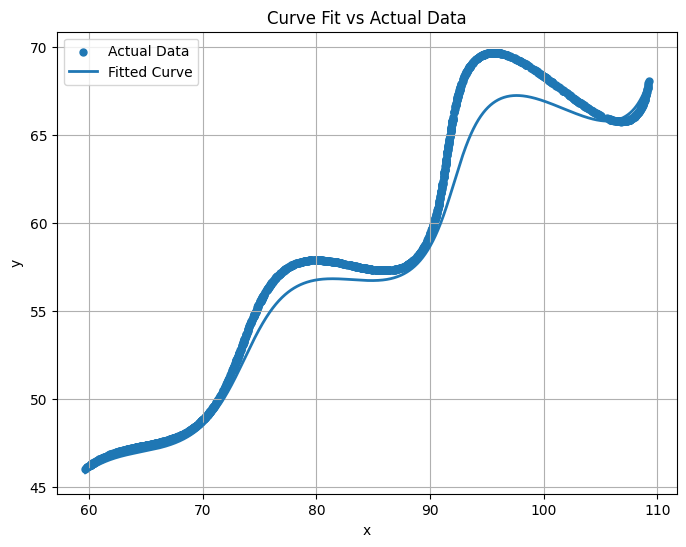

In [19]:
# This plot shows the difference between the actual values and the predicted values (that is the x,y dataset provided and the x,y data predicted using the formula)
# Here it can be seen there is alot of overlap between the two curves showing optimization has been successful.
# Actual data is the thick line (dots) and the predicted is the thin line curve.
x_pred, y_pred = curve(data["t"].values, theta_opt, M_opt, X_opt)

plt.figure(figsize=(8,6))
plt.scatter(data["x"], data["y"], label="Actual Data", s=25)
plt.plot(x_pred, y_pred, label="Fitted Curve", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Curve Fit vs Actual Data")
plt.grid(True)
plt.show()

In [20]:
# This puts the final equation using all the optimized values of M, theta and X
print("\nFinal Parametric Equation:")
print(f"( t*cos({theta_opt:.4f}) - exp({M_opt:.4f}*|t|)*sin(0.3t)*sin({theta_opt:.4f}) + {X_opt:.4f}, "
      f"42 + t*sin({theta_opt:.4f}) + exp({M_opt:.4f}*|t|)*sin(0.3t)*cos({theta_opt:.4f}) )")


Final Parametric Equation:
( t*cos(0.4908) - exp(0.0214*|t|)*sin(0.3t)*sin(0.4908) + 54.9008, 42 + t*sin(0.4908) + exp(0.0214*|t|)*sin(0.3t)*cos(0.4908) )
